
# Loan Default Prediction Analysis

This notebook contains the Exploratory Data Analysis (EDA) performed on the loan dataset to identify patterns that indicate loan default.

## Problem Statement
The goal is to identify patterns which indicate if a person is likely to default on a loan. The insights gained will help in making decisions such as denying the loan, reducing the loan amount, or lending at a higher interest rate to risky applicants.

## Data Description
The dataset contains information about past loan applicants and their loan status, including whether they defaulted or not.

## Analysis Approach
1. Data Loading and Understanding
2. Univariate Analysis
3. Bivariate Analysis
4. Multivariate Analysis
5. Insights and Observations


In [1]:

import pandas as pd

# Load the datasets
loan_data = pd.read_csv('C:/Users/themo/OneDrive/Documents/UpGrad/20-06-2024/draft 1/loan.csv')
data_dictionary = pd.read_excel('C:/Users/themo/OneDrive/Documents/UpGrad/20-06-2024/draft 1/Data_Dictionary.xlsx')

# Display the first few rows of the loan dataset
loan_data.head()


C:\Users\themo\AppData\Local\Temp\ipykernel_7644\3773797409.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('C:/Users/themo/OneDrive/Documents/UpGrad/20-06-2024/draft 1/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:

# Check for missing values in the loan data
missing_values = loan_data.isnull().sum()

# Display data types and missing values
loan_data.info()

# Display missing values summary
missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


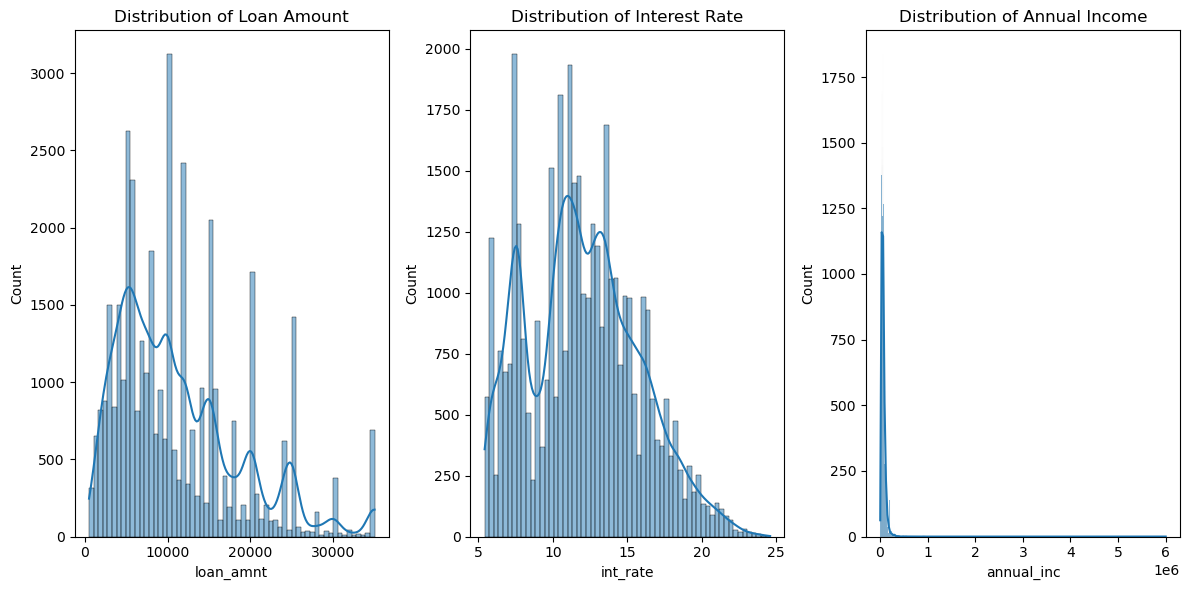

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Convert interest rate to numeric
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float')

# Plot distributions of key variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(loan_data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')

plt.subplot(1, 3, 2)
sns.histplot(loan_data['int_rate'], kde=True)
plt.title('Distribution of Interest Rate')

plt.subplot(1, 3, 3)
sns.histplot(loan_data['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')

plt.tight_layout()
plt.show()


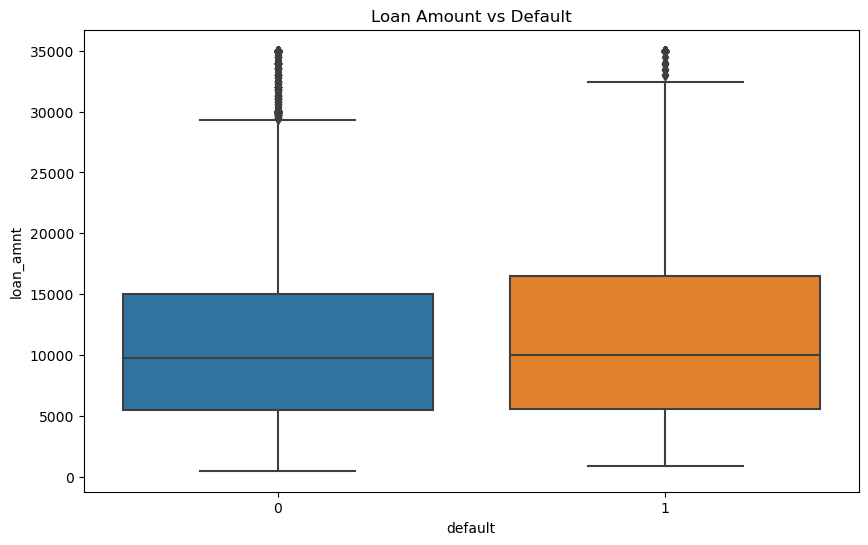

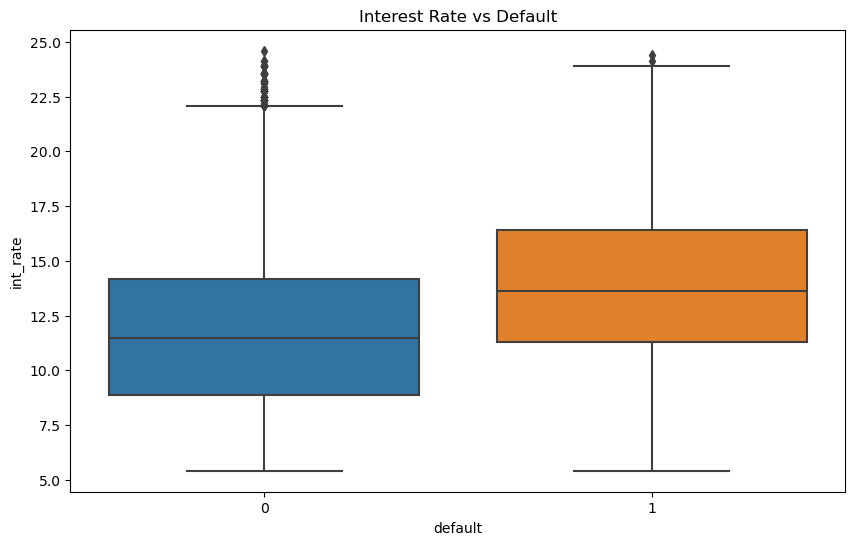

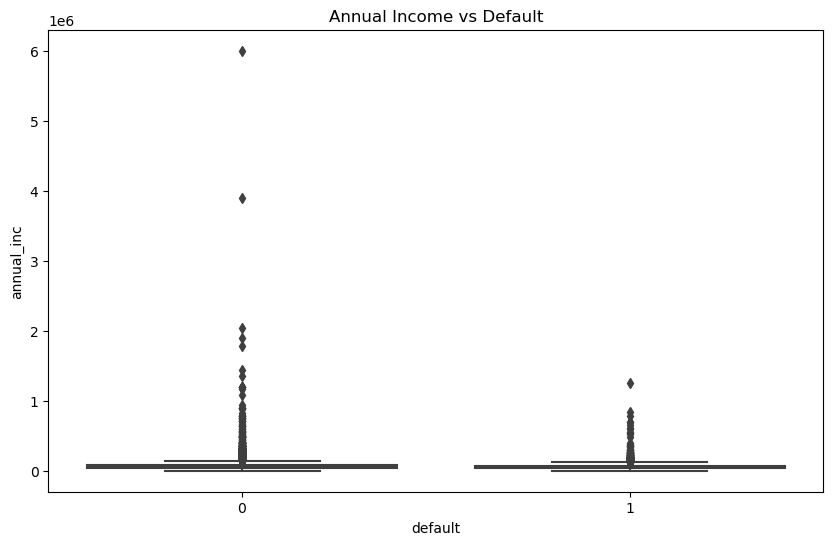

In [4]:

# Convert target variable to binary: 'Fully Paid' = 0, 'Charged Off' = 1
loan_data['default'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Analyze the relationship between loan amount and default
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='loan_amnt', data=loan_data)
plt.title('Loan Amount vs Default')
plt.show()

# Analyze the relationship between interest rate and default
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='int_rate', data=loan_data)
plt.title('Interest Rate vs Default')
plt.show()

# Analyze the relationship between annual income and default
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='annual_inc', data=loan_data)
plt.title('Annual Income vs Default')
plt.show()


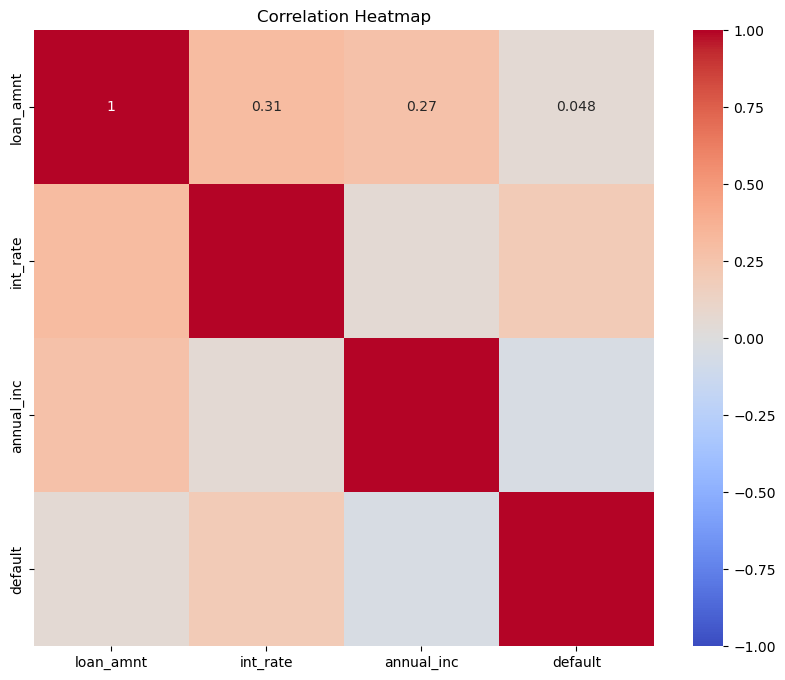

In [5]:

# Ensure all values are numeric
loan_data_clean = loan_data[['loan_amnt', 'int_rate', 'annual_inc', 'default']].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
loan_data_clean = loan_data_clean.dropna()

# Filter out any infinite values
import numpy as np
loan_data_clean = loan_data_clean[np.isfinite(loan_data_clean).all(1)]

# Calculate correlations
correlation_matrix = loan_data_clean.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


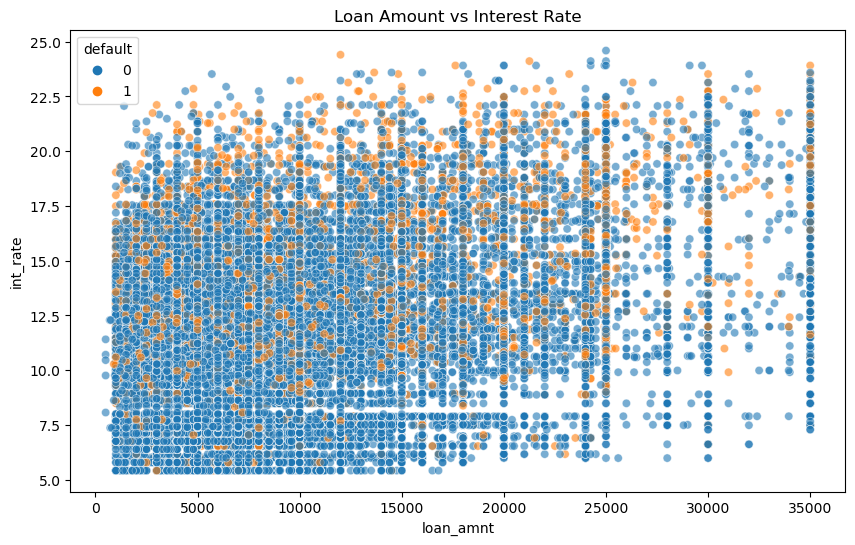

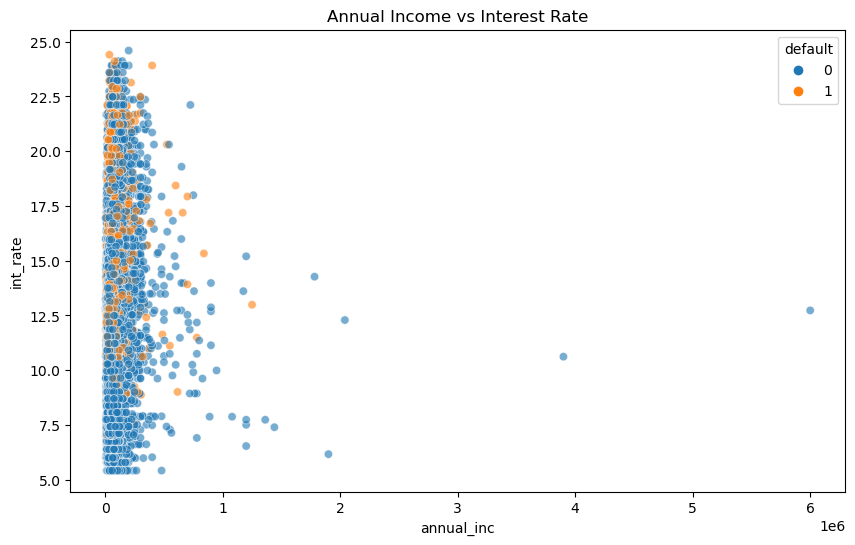

In [6]:

# Scatter plot of loan amount vs. interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='default', data=loan_data_clean, alpha=0.6)
plt.title('Loan Amount vs Interest Rate')
plt.show()

# Scatter plot of annual income vs. interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='int_rate', hue='default', data=loan_data_clean, alpha=0.6)
plt.title('Annual Income vs Interest Rate')
plt.show()
